In [99]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from glob import glob
import pathlib
import common

FONT_SIZE = 15
plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [137]:
data_prefix = '/data/zhenyus/webcachesim/ats_log'
sleep_time = 15.
max_log2_client = 8
n_client = 256
size = '128G'
# algs = ['fifo', 'lru', 'static']
algs = ['fifo', 'gbdt']
unit = 'm' 
means = [0, 300]
gbdt_version = '_fix_mem'

In [148]:
res = []
for mean in means:
    for alg in algs:
        if alg == 'gbdt' and mean == 0:
            df = pd.read_csv(f'{data_prefix}/top_{unit}_{alg}_{size}_{mean}{gbdt_version}.log.awk', names=['VIRT', 'RES', 'CPU'], delimiter=' ')
        else:
            df = pd.read_csv(f'{data_prefix}/top_{unit}_{alg}_{size}_{mean}.log.awk', names=['VIRT', 'RES', 'CPU'], delimiter=' ')
        df['alg'] = alg
        df['mean'] = mean
        res.append(df)
df = pd.concat(res)

In [149]:
# df2 = df[df['alg'] == 'gbdt']
df.loc[(df['alg'] == 'gbdt') & (df['mean'] == 300), 'VIRT'] = df[(df['alg'] == 'gbdt') & (df['mean'] == 300)]['VIRT'].apply(lambda x: float(x[:-1]))

In [150]:
df.loc[(df['alg'] == 'gbdt') & (df['mean'] == 0), 'VIRT'] = df[(df['alg'] == 'gbdt') & (df['mean'] == 0)]['VIRT']/1024.**2

In [151]:
df.loc[df['alg'] == 'fifo', 'VIRT'] = df[df['alg'] == 'fifo']['VIRT']/1024.**2

In [152]:
for l, grp in df.groupby(['alg', 'mean']):
    print(f'{l} {grp.CPU.max()}, {grp.VIRT.max()}')

('fifo', 0) 536.9, 5.256099700927734
('fifo', 300) 99.3, 5.197685241699219
('gbdt', 0) 1164.0, 8.403331756591797
('gbdt', 300) 250.5, 16.7


In [155]:
df[(df.alg == 'gbdt') & (df['mean'] == 0)].tail()

,VIRT,RES,CPU,alg,mean
890,8.27637,6.3g,1040.0,gbdt,0
891,8.40333,6.4g,962.0,gbdt,0
892,8.34083,6.3g,966.8,gbdt,0
893,8.34083,6.3g,483.0,gbdt,0
894,8.34083,6.3g,9.2,gbdt,0


In [156]:
df[(df.alg == 'fifo') & (df['mean'] == 0)].tail()

,VIRT,RES,CPU,alg,mean
885,5.21704,2.6g,477.2,fifo,0
886,5.21704,2.6g,482.2,fifo,0
887,5.21704,2.6g,471.1,fifo,0
888,5.2561,2.6g,471.9,fifo,0
889,5.21704,2.6g,30.4,fifo,0


Text(0, 0.5, 'CPU percentage')

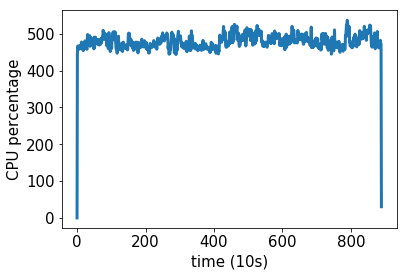

In [24]:
plt.plot(df.CPU)
plt.xlabel(f'time (10s)')
plt.ylabel(f'CPU percentage')

Text(0, 0.5, 'VIRT mem (byte)')

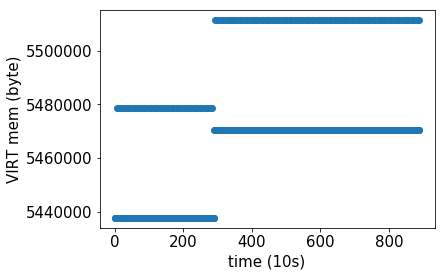

In [25]:
plt.scatter(df.index, df.VIRT)
plt.xlabel(f'time (10s)')
plt.ylabel(f'VIRT mem (byte)')

Text(0, 0.5, 'resident memory')

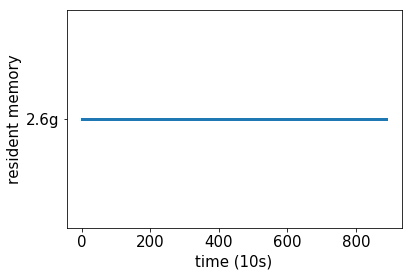

In [27]:
plt.plot(df.RES)
plt.xlabel(f'time (10s)')
plt.ylabel(f'resident memory')